In [3]:
!pip install pandas matplotlib seaborn scikit-learn statsmodels

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA of Crash Data

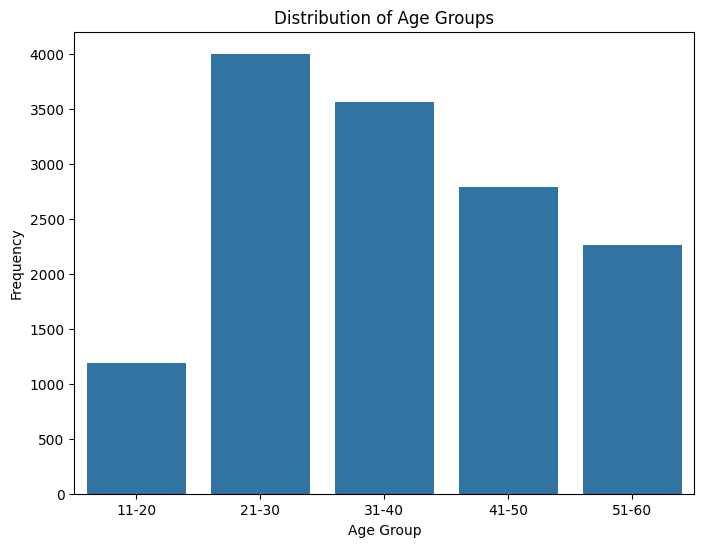

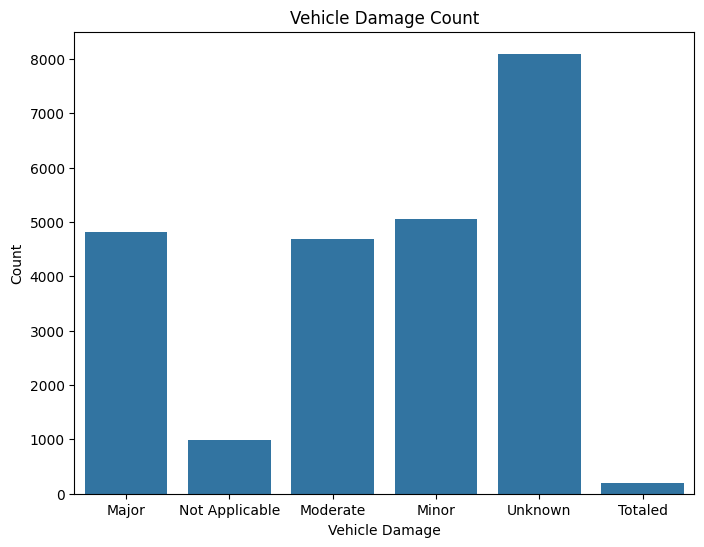

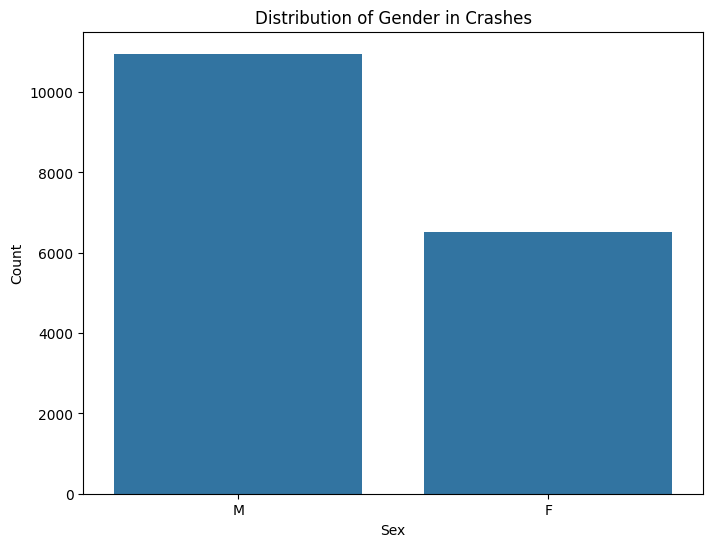

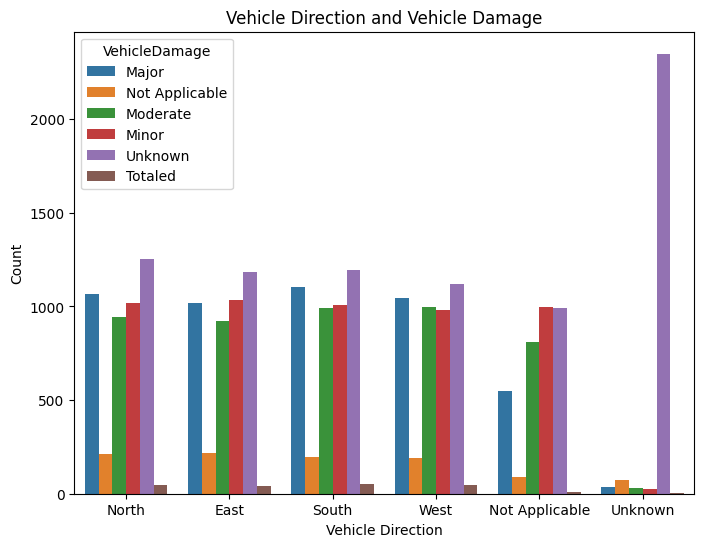

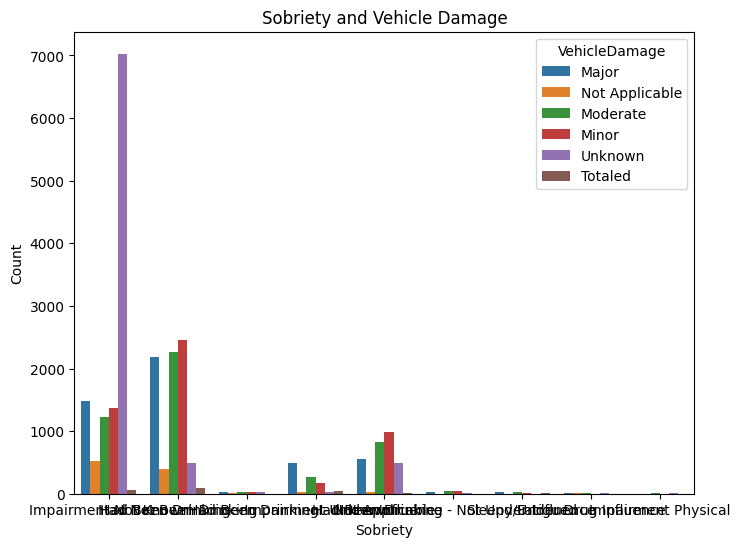

In [7]:

# Load Crash dataset
crash_df = pd.read_csv('crash_data.csv')

# Assuming 'crash_df' has an 'Age' column
crash_df['Age'] = pd.to_numeric(crash_df['Age'], errors='coerce')

# Define age groups (bins)
age_bins = [10, 20, 30, 40, 50, 60]
age_labels = ['11-20', '21-30', '31-40', '41-50', '51-60']

# Create a new column 'Age Group' based on the bins
crash_df['Age Group'] = pd.cut(crash_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Plot 1: Bar chart for Age Group distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Age Group', data=crash_df)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Count plot for VehicleDamage
plt.figure(figsize=(8,6))
sns.countplot(x='VehicleDamage', data=crash_df)
plt.title('Vehicle Damage Count')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

# Plot 3: Gender Distribution in Crashes
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data=crash_df)
plt.title('Distribution of Gender in Crashes')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Plot 4: Vehicle Direction vs Vehicle Damage
plt.figure(figsize=(8,6))
sns.countplot(x='VehicleDirection', hue='VehicleDamage', data=crash_df)
plt.title('Vehicle Direction and Vehicle Damage')
plt.xlabel('Vehicle Direction')
plt.ylabel('Count')
plt.show()

# Plot 5: Sobriety vs VehicleDamage
plt.figure(figsize=(8,6))
sns.countplot(x='Sobriety', hue='VehicleDamage', data=crash_df)
plt.title('Sobriety and Vehicle Damage')
plt.xlabel('Sobriety')
plt.ylabel('Count')
plt.show()


# EDA of Police Data

/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/ipykernel_5187/4236820762.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  police_calls_df['START_DATE'] = pd.to_datetime(police_calls_df['START_DATE'])


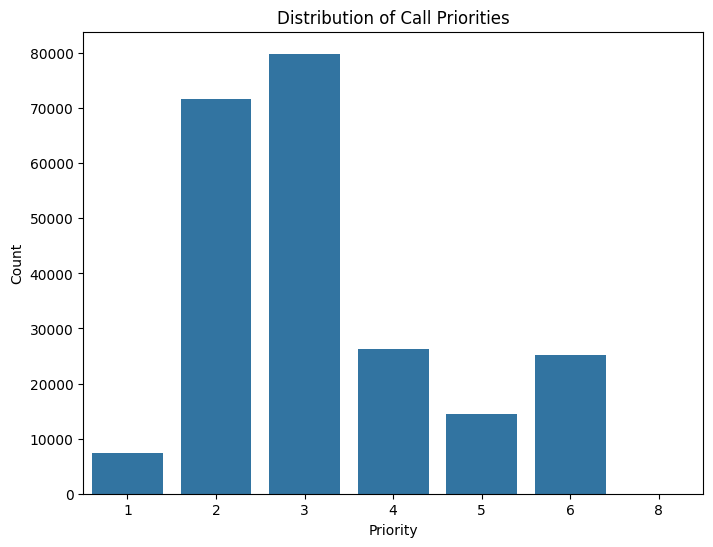

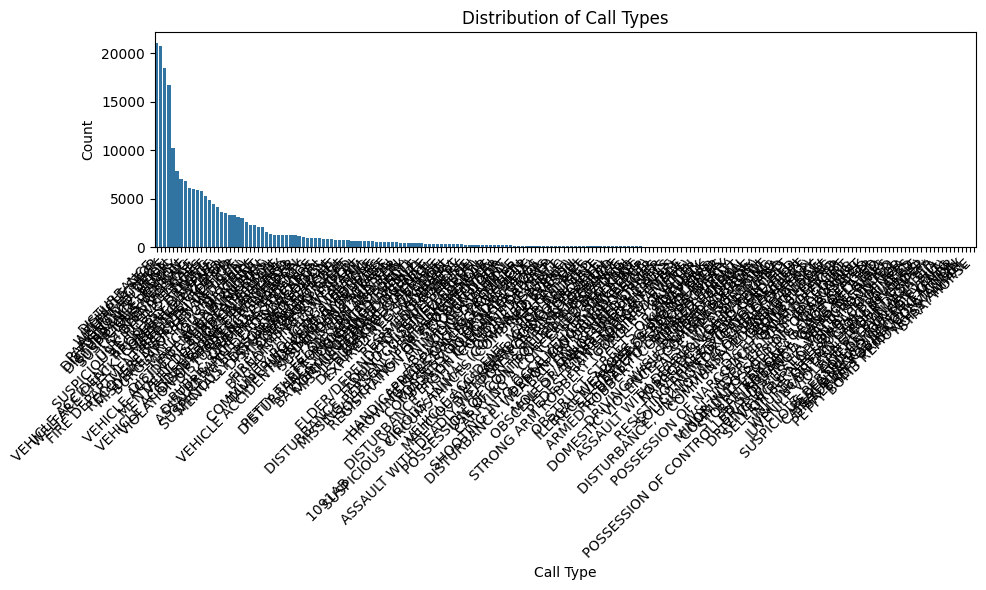

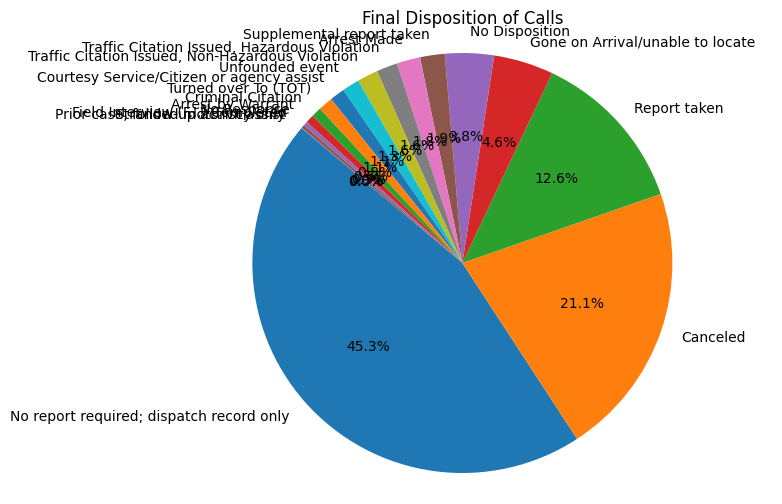

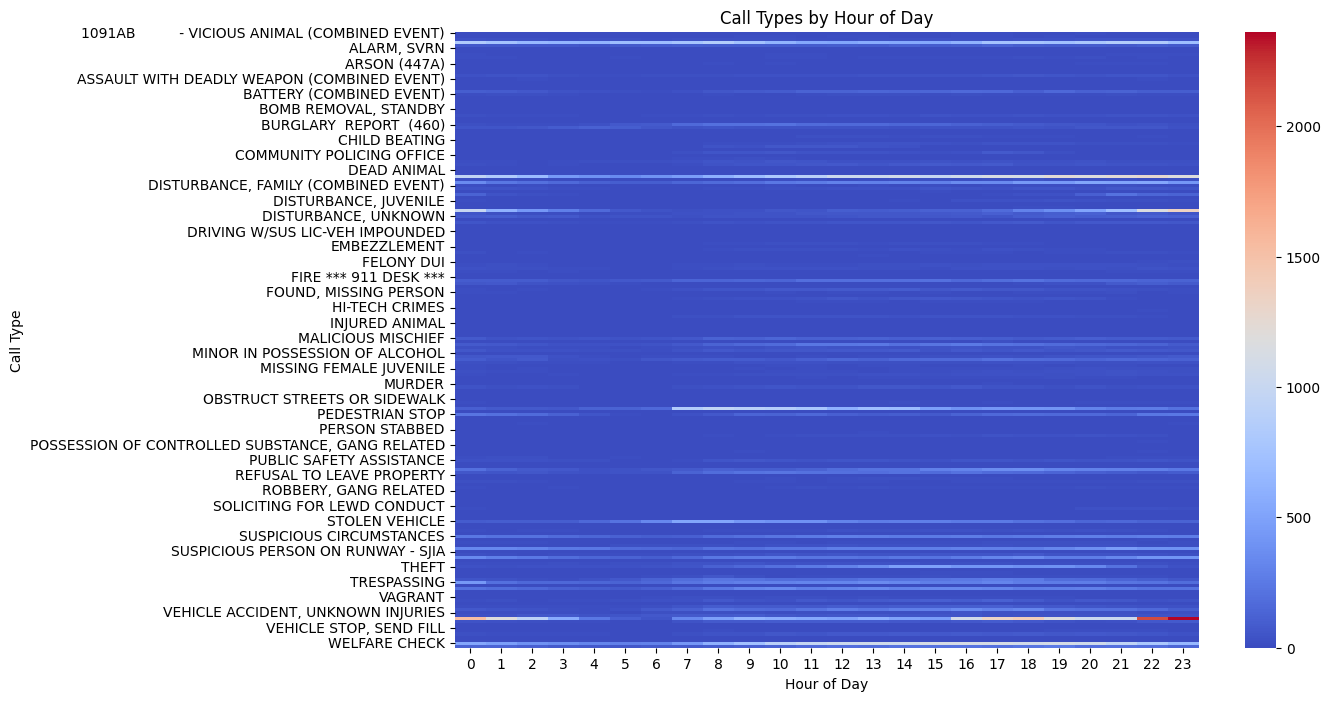

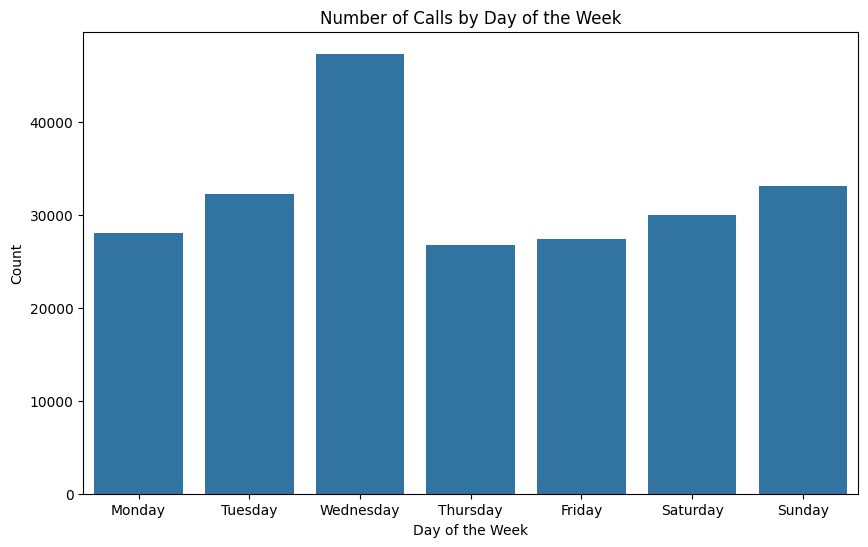

In [69]:
# Load Police Calls dataset
police_calls_df = pd.read_csv('police_data.csv')

# Convert date columns to datetime
police_calls_df['START_DATE'] = pd.to_datetime(police_calls_df['START_DATE'])
police_calls_df['OFFENSE_TIME'] = pd.to_datetime(police_calls_df['OFFENSE_TIME'], format='%H:%M:%S')

# Plot 1: Distribution of Call Priorities
plt.figure(figsize=(8,6))
sns.countplot(x='PRIORITY', data=police_calls_df)
plt.title('Distribution of Call Priorities')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

# Plot 2: Call Types Distribution (Vertical Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='CALL_TYPE', data=police_calls_df, order=police_calls_df['CALL_TYPE'].value_counts().index)
plt.title('Distribution of Call Types')
plt.xlabel('Call Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()


# Plot 3: Final Disposition of Calls (Pie Chart)
plt.figure(figsize=(8, 6))
final_dispo_counts = police_calls_df['FINAL_DISPO'].value_counts()
plt.pie(final_dispo_counts, labels=final_dispo_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Final Disposition of Calls')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Plot 4: Calls by Time of Day (Heatmap)
police_calls_df['Hour'] = police_calls_df['OFFENSE_TIME'].dt.hour
calls_by_hour = police_calls_df.groupby(['CALL_TYPE', 'Hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(calls_by_hour, cmap='coolwarm', annot=False)
plt.title('Call Types by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Call Type')
plt.show()



# Plot 5: Calls by Day of Week
police_calls_df['Day'] = police_calls_df['START_DATE'].dt.day_name()

plt.figure(figsize=(10,6))
sns.countplot(x='Day', data=police_calls_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Calls by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()


# Random forest for predicting Sobriety

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Encode categorical features
label_encoders = {}
for column in crash_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    crash_data[column] = le.fit_transform(crash_data[column].astype(str))
    label_encoders[column] = le

# Prepare features and target
X = crash_data.drop('Sobriety', axis=1)
y = crash_data['Sobriety']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        27
           2       0.84      0.61      0.71       190
           3       0.68      0.89      0.77      1612
           4       0.88      0.74      0.80      2345
           5       0.00      0.00      0.00         2
           6       0.92      0.92      0.92       608
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00         6

    accuracy                           0.80      4822
   macro avg       0.37      0.35      0.36      4822
weighted avg       0.81      0.80      0.79      4822



/Users/anthony/opt/anaconda3/envs/255/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/opt/anaconda3/envs/255/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/opt/anaconda3/envs/255/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

# Forcasting using FbProphet

In [33]:
!pip install prophet

  Using cached holidays-0.59-py3-none-any.whl.metadata (25 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 28.5 MB/s eta 0:00:00a 0:00:01
Using cached holidays-0.59-py3-none-any.whl (1.1 MB)


19:44:33 - cmdstanpy - INFO - Chain [1] start processing
19:44:33 - cmdstanpy - INFO - Chain [1] done processing


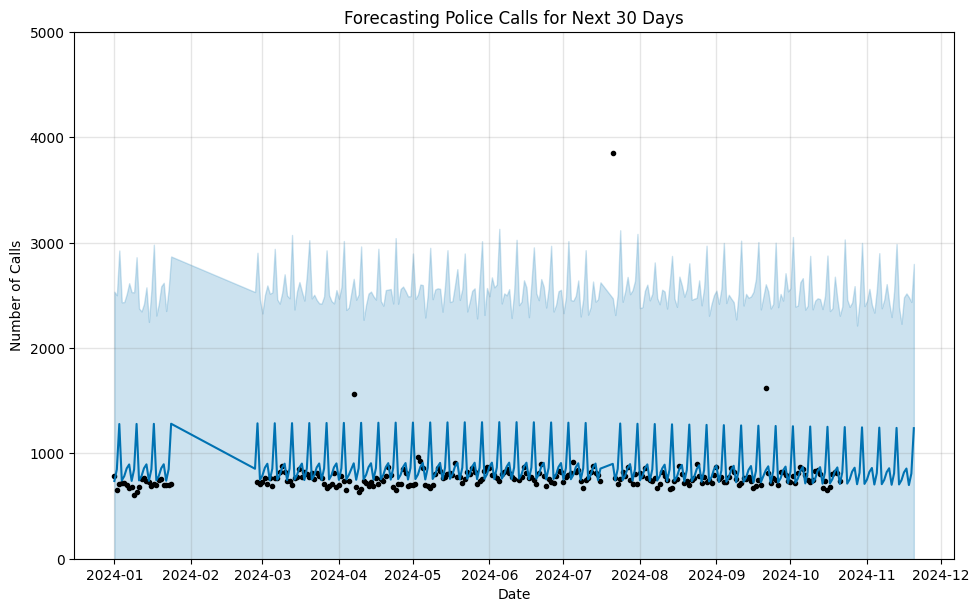

In [62]:
from prophet import Prophet

# Prepare data for time series forecasting
police_calls_df['START_DATE'] = pd.to_datetime(police_calls_df['START_DATE'])
calls_per_day = police_calls_df.groupby(police_calls_df['START_DATE'].dt.date).size().reset_index(name='calls')

# Rename columns for Prophet
calls_per_day.columns = ['ds', 'y']

# Instantiate and fit the Prophet model
model = Prophet()
model.fit(calls_per_day)

# Create a future dataframe for prediction
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Forecasting Police Calls for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Number of Calls')

plt.ylim(0, 5000)
plt.show()

### Below 👇 is the zoomed version of above ☝️ graph

11:23:16 - cmdstanpy - INFO - Chain [1] start processing
11:23:16 - cmdstanpy - INFO - Chain [1] done processing


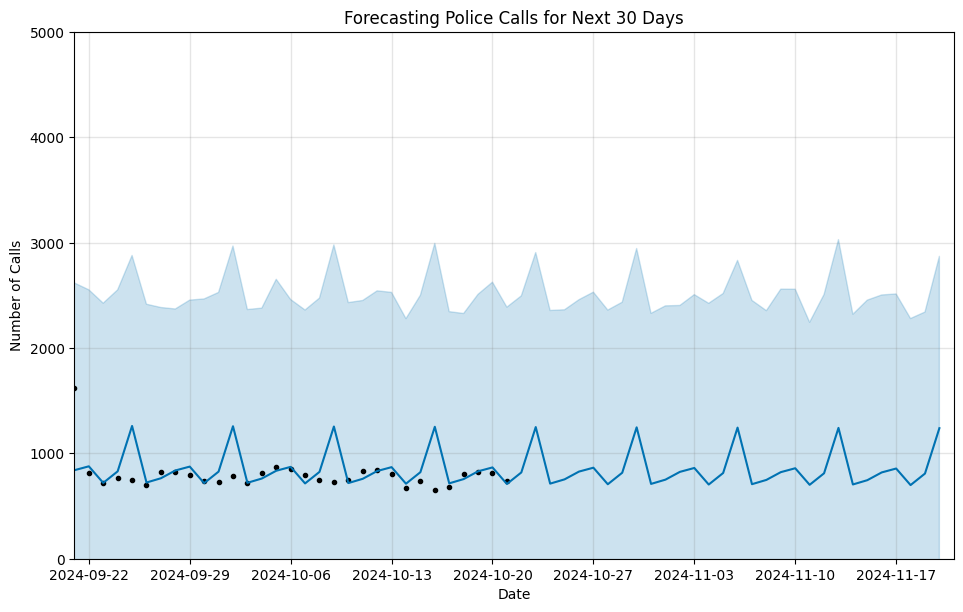

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Prepare data for time series forecasting
police_calls_df['START_DATE'] = pd.to_datetime(police_calls_df['START_DATE'])
calls_per_day = police_calls_df.groupby(police_calls_df['START_DATE'].dt.date).size().reset_index(name='calls')

# Rename columns for Prophet
calls_per_day.columns = ['ds', 'y']

# Instantiate and fit the Prophet model
model = Prophet()
model.fit(calls_per_day)

# Create a future dataframe for prediction
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)

# Set title and labels
plt.title('Forecasting Police Calls for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.ylim(0, 5000)

# Set x-axis limits to show only the last month of historical data and the next month of forecasted data
last_month = calls_per_day['ds'].max()  # Get the latest date in historical data
plt.xlim(pd.Timestamp(last_month) - pd.DateOffset(months=1), pd.Timestamp(last_month) + pd.DateOffset(months=1))

plt.show()



# Forcasting using ARIMA

ADF Statistic: -16.41312434579886
p-value: 2.572291874308852e-29


/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/ipykernel_5187/1178093890.py:32: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_month = daily_calls.last('30D').fillna(0)


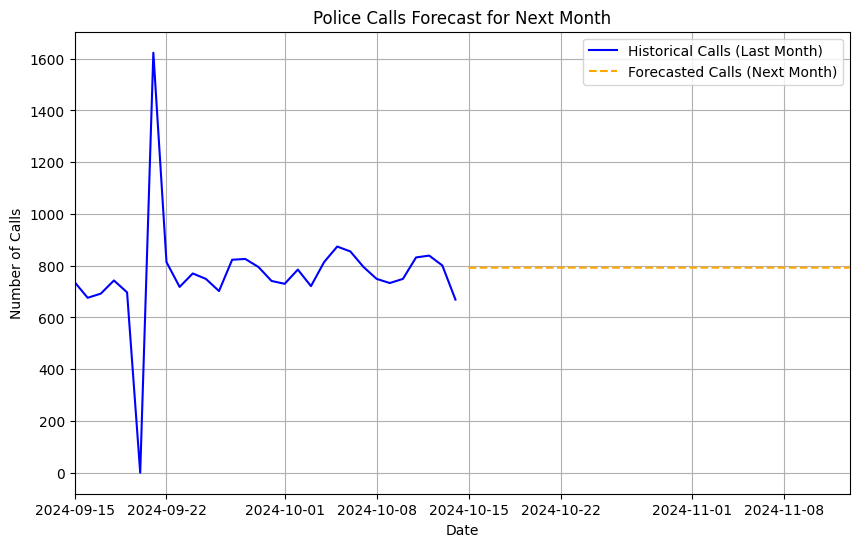

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Assuming police_calls_data is your DataFrame
# Convert START_DATE to datetime format
police_calls_data['START_DATE'] = pd.to_datetime(police_calls_data['START_DATE'])

# Resample data to daily frequency and fill missing dates with 0
daily_calls = police_calls_data['START_DATE'].value_counts().resample('D').sum().fillna(0)

# Check stationarity
result = adfuller(daily_calls)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Differencing if necessary
if result[1] > 0.05:
    daily_calls = daily_calls.diff().dropna()  # Differencing the series to make it stationary

# Fit ARIMA model
model = ARIMA(daily_calls, order=(1, 1, 1))  # Adjust order as needed
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)
forecast_index = pd.date_range(start=daily_calls.index[-1] + pd.Timedelta(days=1), periods=30)
forecast_series = pd.Series(forecast, index=forecast_index)

# Prepare to plot only the last month of historical data and the next month of forecasted data
last_month = daily_calls.last('30D').fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(last_month.index, last_month, label='Historical Calls (Last Month)', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Calls (Next Month)', color='orange', linestyle='--')
plt.title('Police Calls Forecast for Next Month')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.xlim([last_month.index[0], forecast_series.index[-1]])  # Set x-axis limits
plt.legend()
plt.grid()
plt.show()
